# Extracting and Understanding IceCube data

In [1]:
import icecube
from icecube import icetray, dataclasses, dataio, simclasses
from icecube.icetray import I3Units,I3Frame
from icecube.dataclasses import I3Particle
from matplotlib import pyplot as plt
import numpy as np
import sys, os
import math

### Plot 1

In [13]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [12]:
energy_primary=[]
for frame in infile:
    infile.pop_frame()
    energy_primary.append(frame['I3MCWeightDict']['PrimaryNeutrinoEnergy'])

RuntimeError: input stream error

In [14]:
length=[]
for frame in infile:
    infile.pop_frame()
    length.append(frame['I3MCWeightDict']['LengthInVolume'])

RuntimeError: input stream error

In [15]:
idx = np.argsort(energy_primary)
energy_primary_list = np.array(energy_primary)[idx]
length_list = np.array(length)[idx]

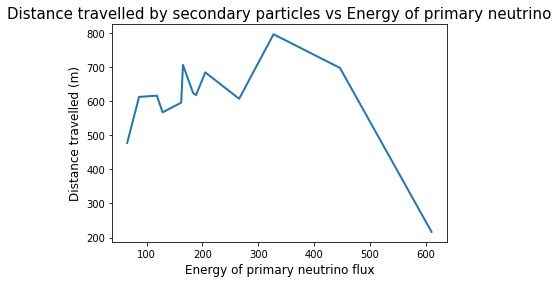

In [16]:
plt.plot(energy_primary_list,length_list,linewidth=2)
plt.xlabel("Energy of primary neutrino flux",fontsize=12)
plt.ylabel("Distance travelled (m)",fontsize=12)
plt.title("Distance travelled by secondary particles vs Energy of primary neutrino",fontsize=15)
plt.show()

### Plot 2

In [19]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [18]:
nhits=[]
for frame in infile:
    infile.pop_frame()
    pulseseriesmapmask=frame["InIcePulses"]
    pulseseriesmap=pulseseriesmapmask.apply(frame)
    nhits.append(len(pulseseriesmap.keys()))    

RuntimeError: input stream error

In [20]:
energy_primary=[]
for frame in infile:
    infile.pop_frame()
    energy_primary.append(frame['I3MCWeightDict']['PrimaryNeutrinoEnergy'])

RuntimeError: input stream error

In [21]:
idx   = np.argsort(energy_primary)
energy_primary_list = np.array(energy_primary)[idx]
nhits_list = np.array(nhits)[idx]

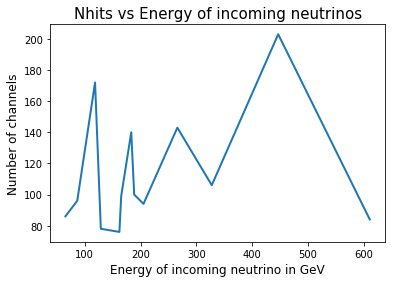

In [22]:
plt.plot(energy_primary_list, nhits_list, linewidth=2)
plt.xlabel("Energy of incoming neutrino in GeV",fontsize=12)
plt.ylabel("Number of channels",fontsize=12)
plt.title("Nhits vs Energy of incoming neutrinos",fontsize=15)
plt.show()

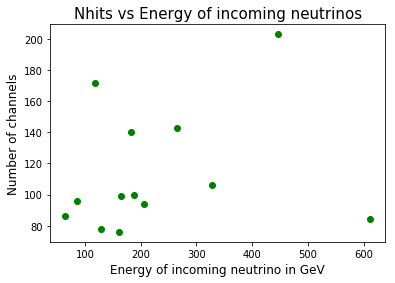

In [23]:
plt.scatter(energy_primary_list, nhits_list,color='green')
plt.xlabel("Energy of incoming neutrino in GeV",fontsize=12)
plt.ylabel("Number of channels",fontsize=12)
plt.title("Nhits vs Energy of incoming neutrinos",fontsize=15)
plt.show()

### Plot 3

In [28]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [29]:
charges=[]
flags=[]
infile.pop_frame()
pulseseriesmapmask=frame["InIcePulses"]
pulseseriesmap=pulseseriesmapmask.apply(frame) 
for omkey in pulseseriesmap.keys():
    for pulse in pulseseriesmap[omkey]:
        charges.append(pulse.charge)  
        flags.append(pulse.flags)

In [30]:
print(charges)

[0.824999988079071, 1.524999976158142, 0.9750000238418579, 0.7749999761581421, 0.7749999761581421, 1.4249999523162842, 0.7749999761581421, 0.675000011920929, 0.574999988079071, 0.675000011920929, 0.4749999940395355, 0.7250000238418579, 0.375, 0.5249999761581421, 0.875, 1.125, 0.32499998807907104, 0.7250000238418579, 0.9750000238418579, 0.7749999761581421, 2.7249999046325684, 1.1749999523162842, 0.625, 0.675000011920929, 0.675000011920929, 0.32499998807907104, 1.625, 0.375, 0.2750000059604645, 1.0750000476837158, 0.375, 1.6749999523162842, 0.375, 0.2750000059604645, 0.5249999761581421, 1.125, 0.625, 0.675000011920929, 0.925000011920929, 0.2750000059604645, 1.1749999523162842, 0.375, 0.574999988079071, 1.625, 1.125, 0.7250000238418579, 1.375, 1.225000023841858, 0.7749999761581421, 1.625, 0.824999988079071, 0.625, 0.875, 0.7250000238418579, 1.225000023841858, 1.225000023841858, 0.574999988079071, 1.4249999523162842, 0.5249999761581421, 0.22499999403953552, 0.7749999761581421, 0.2249999940

In [12]:
print(flags)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4]


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


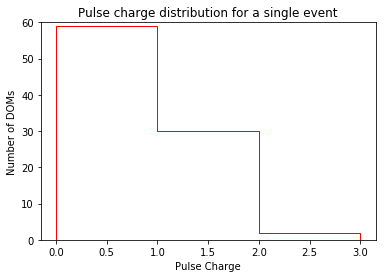

In [31]:
bin_it = np.linspace(0,math.ceil(max(charges)),math.ceil(max(charges))+1)
counts_charges, bins, patches = plt.hist(charges,bin_it,color='r',histtype='step')
plt.ylim(0,max(counts_charges)+1)
plt.xlabel('Pulse Charge')
plt.ylabel('Number of DOMs')
plt.title('Pulse charge distribution for a single event')
plt.show()

In [32]:
infile.rewind()
charges_ATWD=[]
charges_FADC=[]
infile.pop_frame()
pulseseriesmapmask=frame["InIcePulses"]
pulseseriesmap=pulseseriesmapmask.apply(frame) 
for omkey in pulseseriesmap.keys():
    for pulse in pulseseriesmap[omkey]:
        if(pulse.flags==4):
            charges_FADC.append(pulse.charge)
        else:
            charges_ATWD.append(pulse.charge)

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


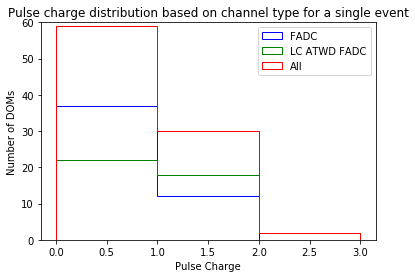

In [50]:
bin_it = np.linspace(0,math.ceil(max(charges)),math.ceil(max(charges))+1)
counts, bins, patches = plt.hist(charges_FADC,bin_it,color='blue',histtype='step', label='FADC')
plt.hist(charges_ATWD,bin_it,color='green',histtype='step', label='LC ATWD FADC')
plt.hist(charges,bin_it,color='red',histtype='step',label='All')
plt.ylim(0,max(counts_charges)+1)
plt.xlabel('Pulse Charge')
plt.ylabel('Number of DOMs')
plt.title('Pulse charge distribution based on channel type for a single event')
plt.legend(loc='upper right')
plt.show()

### Plot 4

In [24]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [25]:
n_chan=[]
while(infile.more()):
    frame = infile.pop_frame()
    pulseseriesmapmask=frame["InIcePulses"]
    pulseseriesmap=pulseseriesmapmask.apply(frame)
    n_chan.append(len(pulseseriesmap.keys()))  

RuntimeError: input stream error

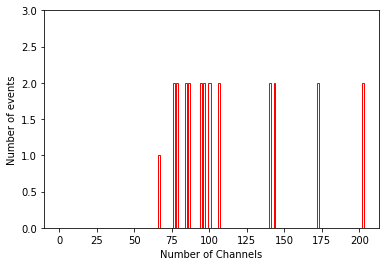

In [26]:
bin_it = np.linspace(0,max(n_chan),max(n_chan)+1)
counts, bins, patches = plt.hist(n_chan,bin_it,color='r',histtype='step')
plt.ylim(0,max(counts)+1)
plt.xlabel('Number of Channels')
plt.ylabel('Number of events')
plt.show()

### Plot 5

In [33]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [32]:
zenith=[]
for frame in infile:
    daq=infile.pop_frame()
    mctree=daq['I3MCTree']
    neutrino=mctree.get_primaries()
    n=neutrino[0]
    zenith.append(n.dir.zenith)

RuntimeError: input stream error

In [34]:
energy=[]
for frame in infile:
    infile.pop_frame()
    energy.append(frame['I3MCWeightDict']['PrimaryNeutrinoEnergy'])

RuntimeError: input stream error

In [35]:
idx   = np.argsort(zenith)
zenith_list = np.array(zenith)[idx]
energy_list = np.array(energy)[idx]

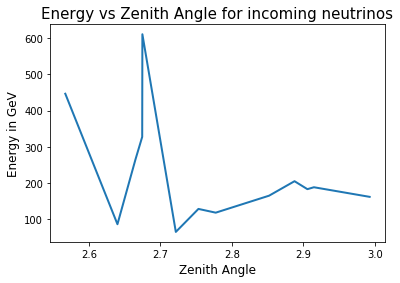

In [36]:
plt.plot(zenith_list, energy_list, linewidth=2)
plt.xlabel("Zenith Angle",fontsize=12)
plt.ylabel("Energy in GeV",fontsize=12)
plt.title("Energy vs Zenith Angle for incoming neutrinos",fontsize=15)
plt.show()

### Plot 6

In [39]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [38]:
azimuthal=[]
for frame in infile:
    daq=infile.pop_frame()
    mctree=daq['I3MCTree']
    neutrino=mctree.get_primaries()
    n=neutrino[0]
    azimuthal.append(n.dir.azimuth)

RuntimeError: input stream error

In [40]:
energy=[]
for frame in infile:
    infile.pop_frame()
    energy.append(frame['I3MCWeightDict']['PrimaryNeutrinoEnergy'])

RuntimeError: input stream error

In [41]:
idx   = np.argsort(azimuthal)
azimuthal_list = np.array(azimuthal)[idx]
energy_list = np.array(energy)[idx]

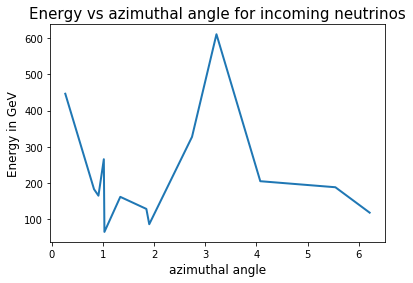

In [42]:
plt.plot(azimuthal_list, energy_list, linewidth=2)
plt.xlabel("azimuthal angle",fontsize=12)
plt.ylabel("Energy in GeV",fontsize=12)
plt.title("Energy vs azimuthal angle for incoming neutrinos",fontsize=15)
plt.show()

### Plot 7

In [43]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [44]:
zenith=[]
for frame in infile:
    frame = infile.pop_physics()
    LineFitDC=frame['LineFit_DC']
    zenith.append(LineFitDC.dir.zenith)

RuntimeError: input stream error

In [12]:
print(zenith)

[1.482680100491094, 2.866588027753284, 2.7717652480022066, 2.8748348887735458, 2.890178698382512, 2.6847302430740285, 2.7879781634069327, 2.7738548405403574, 2.764641143304434, 2.710282772631092, 2.677219352017457, 2.8648781737164812, 2.63001771659567]


In [46]:
events=[1,2,3,4,5,6,7,8,9,10,11,12,13]

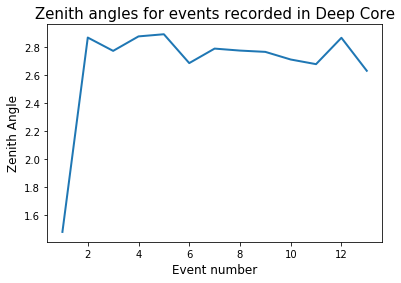

In [47]:
plt.plot(events, zenith, linewidth=2)
plt.xlabel("Event number",fontsize=12)
plt.ylabel("Zenith Angle",fontsize=12)
plt.title("Zenith angles for events recorded in Deep Core",fontsize=15)
plt.show()

### Plot 8

In [48]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [49]:
zenith_true=[]
zenith_fit=[]
azimuthal_true=[]
for frame in infile:
    daq=infile.pop_daq()
    phy=infile.pop_physics()
    mctree=daq['I3MCTree']
    neutrino=mctree.get_primaries()
    n=neutrino[0]
    zenith_true.append(n.dir.zenith)
    azimuthal_true.append(n.dir.azimuth)
    LineFitDC=phy['LineFit']
    zenith_fit.append(LineFitDC.dir.zenith)

RuntimeError: input stream error

In [50]:
print(zenith_true)

[2.905663314950392, 2.674715191779629, 2.674470408191232, 2.75316860175413, 2.6651286820838638, 2.8876450349997755]


In [51]:
print(zenith_fit)

[2.866588027753284, 2.8748348887735458, 2.6847302430740285, 2.7738548405403574, 2.710282772631092, 2.8648781737164812]


In [52]:
zenith_error=[]
for i in range(len(zenith_true)):
    zenith_error.append(abs(zenith_true[i]-zenith_fit[i]))
print(zenith_error)

[0.03907528719710829, 0.20011969699391674, 0.010259834882796692, 0.020686238786227218, 0.045154090547228076, 0.022766861283294304]


In [53]:
print(azimuthal_true)

[0.8279908452024776, 3.2199676664668244, 2.7425066475103304, 1.8505584535564275, 1.0197516860226363, 4.076100717559125]


In [54]:
idx   = np.argsort(azimuthal_true)
azimuthal_true_list = np.array(azimuthal_true)[idx]
zenith_error_list = np.array(zenith_error)[idx]

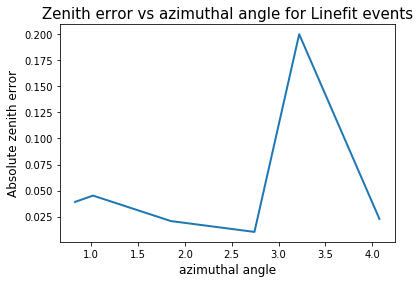

In [55]:
plt.plot(azimuthal_true_list, zenith_error_list, linewidth=2)
plt.xlabel("azimuthal angle",fontsize=12)
plt.ylabel("Absolute zenith error",fontsize=12)
plt.title("Zenith error vs azimuthal angle for Linefit events",fontsize=15)
plt.show()

In [56]:
idx   = np.argsort(zenith_true)
zenith_true_list = np.array(zenith_true)[idx]
zenith_error_list = np.array(zenith_error)[idx]

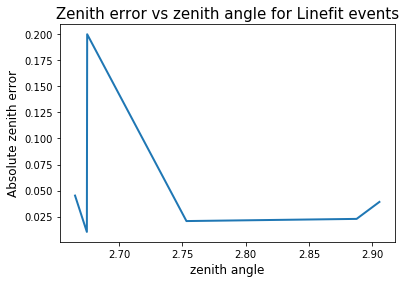

In [57]:
plt.plot(zenith_true_list, zenith_error_list, linewidth=2)
plt.xlabel("zenith angle",fontsize=12)
plt.ylabel("Absolute zenith error",fontsize=12)
plt.title("Zenith error vs zenith angle for Linefit events",fontsize=15)
plt.show()

### Plot 9

In [60]:
infile_name="/data/icecube/testfiles/testfile.i3.zst"
infile=dataio.I3File(infile_name)

In [59]:
zenith_true=[]
azimuthal_true=[]
zenith_fit=[]
azimuthal_fit=[]
for frame in infile:
    daq=infile.pop_daq()
    phy=infile.pop_physics()
    mctree=daq['I3MCTree']
    neutrino=mctree.get_primaries()
    n=neutrino[0]
    zenith_true.append(n.dir.zenith)
    azimuthal_true.append(n.dir.azimuth)
    LineFitDC=phy['LineFit']
    zenith_fit.append(LineFitDC.dir.zenith)
    azimuthal_fit.append(LineFitDC.dir.azimuth)

RuntimeError: input stream error

In [61]:
tot_ang_error=[]
sin=np.sin
cos=np.cos
zenith_true=np.radians(zenith_true)
zenith_fit=np.radians(zenith_fit)
azimuthal_true=np.radians(azimuthal_true)
azimuthal_fit=np.radians(azimuthal_fit)

for i in range(len(zenith_true)):
    tot_ang_error.append(math.acos(sin(zenith_true[i])*sin(azimuthal_true[i])*sin(zenith_fit[i])*sin(azimuthal_fit[i])+sin(zenith_true[i])*cos(azimuthal_true[i])*sin(zenith_fit[i])*sin(azimuthal_fit[i])+cos(zenith_true[i])*cos(zenith_fit[i])))
tot_ang_error=np.degrees(tot_ang_error)

In [62]:
idx   = np.argsort(azimuthal_true)
azimuthal_true_list = np.array(azimuthal_true)[idx]
tot_ang_error_list = np.array(tot_ang_error)[idx]

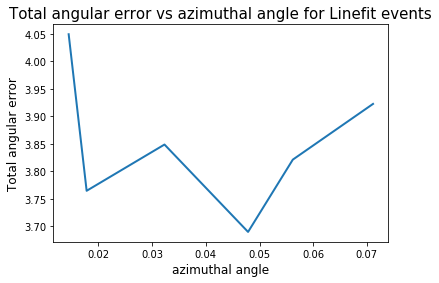

In [63]:
plt.plot(azimuthal_true_list, tot_ang_error_list, linewidth=2)
plt.xlabel("azimuthal angle",fontsize=12)
plt.ylabel("Total angular error",fontsize=12)
plt.title("Total angular error vs azimuthal angle for Linefit events",fontsize=15)
plt.show()